# Test PSD - EEG & EDA

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-01\eeg\sub-01_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
595 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows


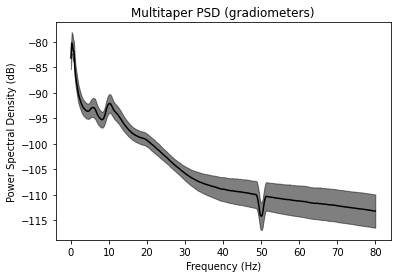

In [4]:
import mne
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


f, ax = plt.subplots()
number_subject = '01'
extension = '.fif'
directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                    'sub-' + number_subject + '_task-rest_proc-autoreject_epo' + extension)
epochs = mne.read_epochs(fname_fif, preload=True)
psds, freqs = mne.time_frequency.psd_multitaper(epochs, fmin=0, fmax=80, n_jobs=1)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD (gradiometers)', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-01\eeg\sub-01_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
595 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows


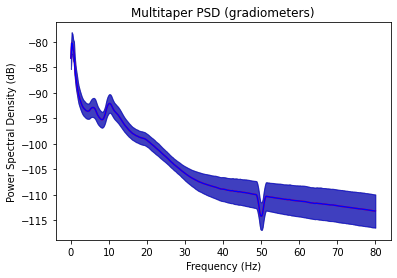

In [6]:
import mne
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


f, ax = plt.subplots()
number_subject = '01'
extension = '.fif'
directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                    'sub-' + number_subject + '_task-rest_proc-autoreject_epo' + extension)
epochs = mne.read_epochs(fname_fif, preload=True)
psds, freqs = mne.time_frequency.psd_multitaper(epochs, fmin=0, fmax=80, n_jobs=1)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

# 
ax.plot(freqs, psds_mean, color='r')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)

ax.plot(freqs, psds_mean, color='b')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='b', alpha=.5)

ax.set(title='Multitaper PSD', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

In [1]:
# Empezar aca la funcion praa obtener los indices de las epocas de EDA high y low
import datetime
import importlib
import os
import os.path as op

import h5io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from coffeine import make_filter_bank_regressor
from joblib import Parallel, delayed
from sklearn.linear_model import GammaRegressor, RidgeCV
from sklearn.model_selection import (GridSearchCV, KFold, cross_val_predict,
                                     cross_val_score)
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, quantile_transform

dataset =  'deap'
config_map = {'deap': "config_deap_eeg"}

cfg = importlib.import_module(config_map[dataset])
bids_root = cfg.bids_root
deriv_root = cfg.deriv_root
analyze_channels = cfg.analyze_channels

condition = 'rest'
feature_label = 'fb_covs'

#########  SET CONFIGS #########

# eda or emg?    
measure = 'eda'
# var or mean?   
y_stat = 'var'

DEBUG = True

################################


derivative_path = deriv_root 
pred_path = derivative_path / f'{measure}_predictions'

#%%


date = datetime.datetime.now().strftime("%d-%m--%H-%M")    
n_components = np.arange(1, 32, 1)
seed = 42
n_splits = 5
n_jobs = -1
score_name, scoring = "r2", "r2"
cv_name = '5Fold'


features_y = h5io.read_hdf5(deriv_root / f'features_EDA_{condition}.h5')

subjects = ['sub-01']

for subject in subjects:
    eda_features = [features_y[subject]]
    y = eda_features[0]['meanEDA_SMNA']

c:\Users\dadam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
len(y)

595

In [3]:
np.median(y)

24.421803023882156

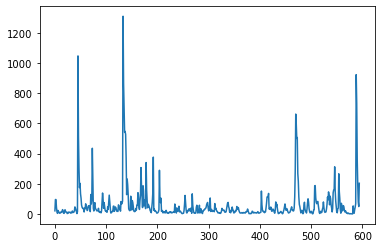

In [4]:
plt.plot(y)

In [21]:
idx_low_EDA = []
idx_high_EDA = []
for ii in range(len(y)-1):
    if y[ii] < np.percentile(y, 25):
        idx_low_EDA.append(ii)
    elif y[ii] > np.percentile(y, 75):
        idx_high_EDA.append(ii)

In [15]:
len(idx_low_EDA)

297

c:\Users\dadam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-01\eeg\sub-01_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
595 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


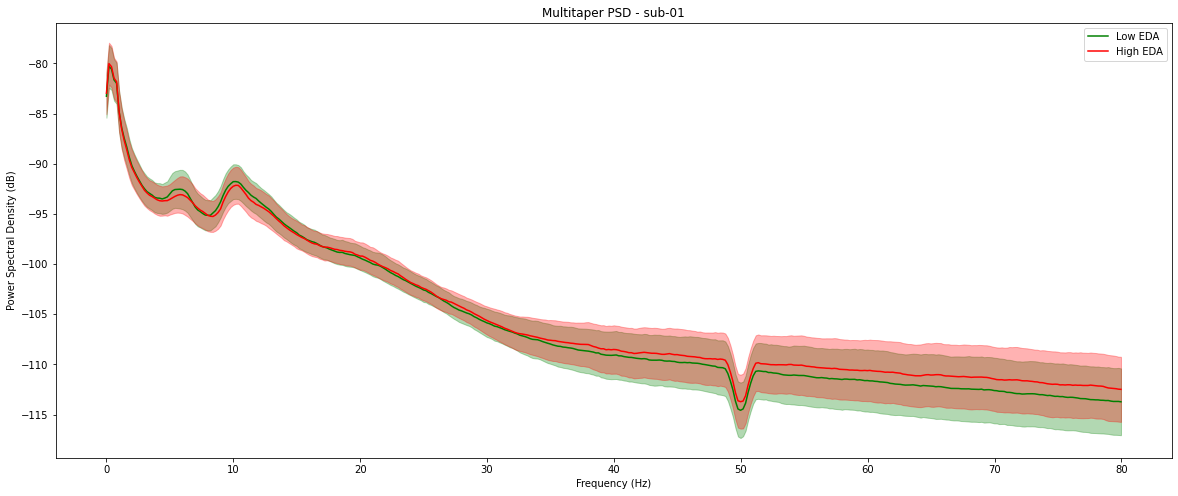

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-02\eeg\sub-02_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
478 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


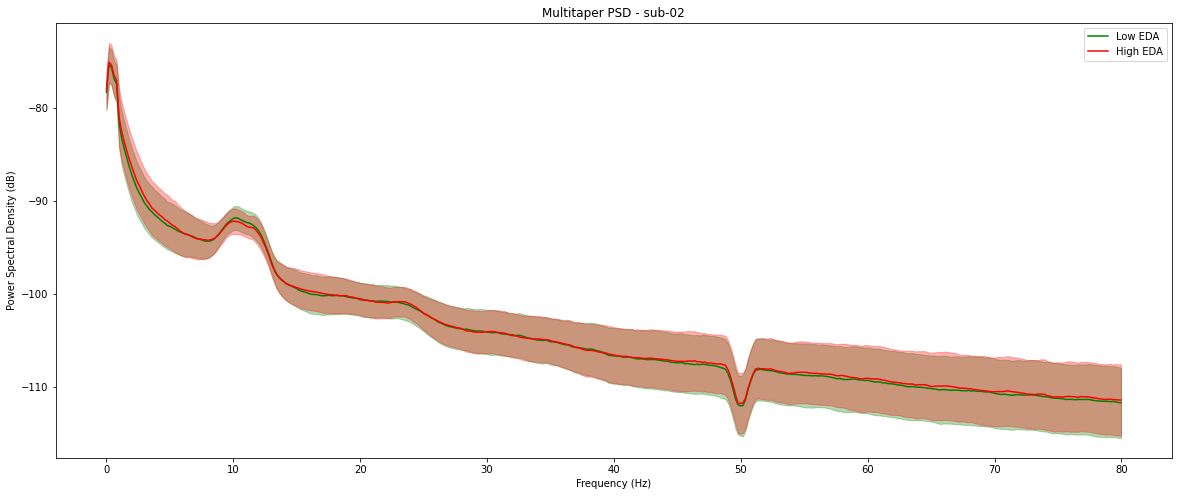

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-03\eeg\sub-03_task-rest_proc-autoreject_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
573 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


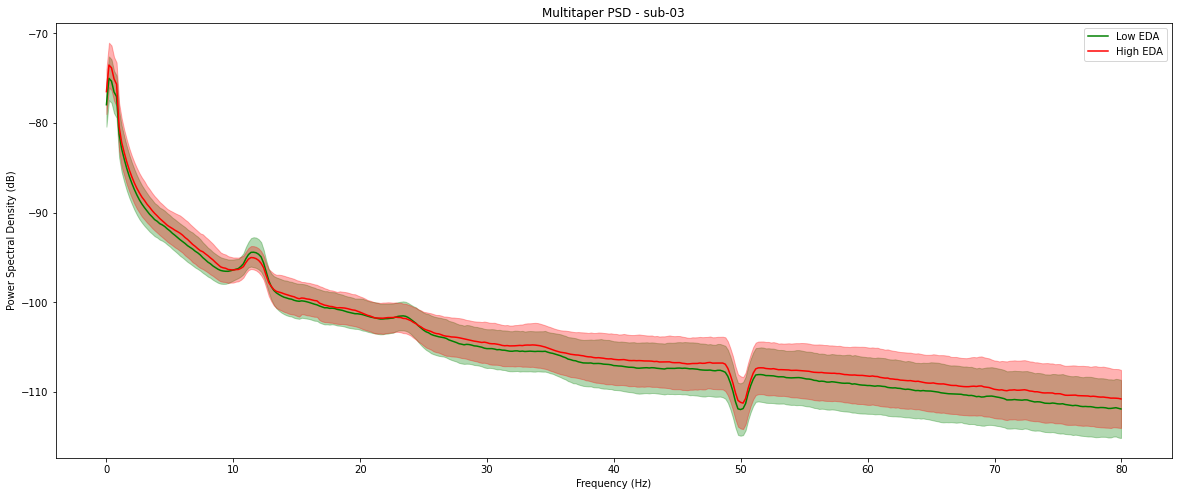

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-04\eeg\sub-04_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
572 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


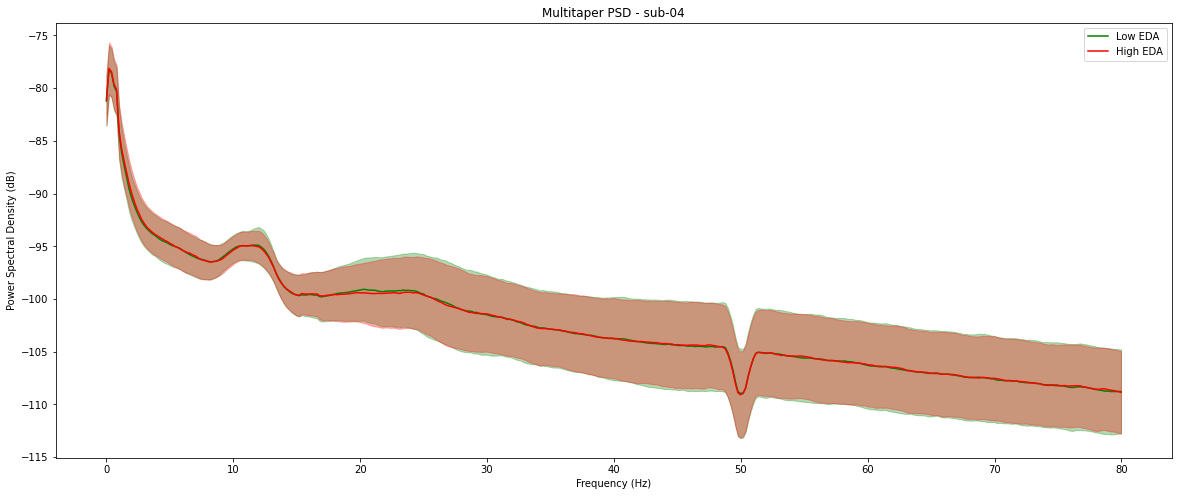

Reading c:\Users\dadam\arousal_project\arousal_decoding_extended\outputs\DEAP-bids\derivatives\mne-bids-pipeline\sub-05\eeg\sub-05_task-rest_proc-autoreject_epo.fif ...
    Read a total of 2 projection items:
        EOG-eeg--0.199-0.199-PCA-01 (1 x 32) active
        Average EEG reference (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    5000.00 ms
        0 CTF compensation matrices available
Not setting metadata
580 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


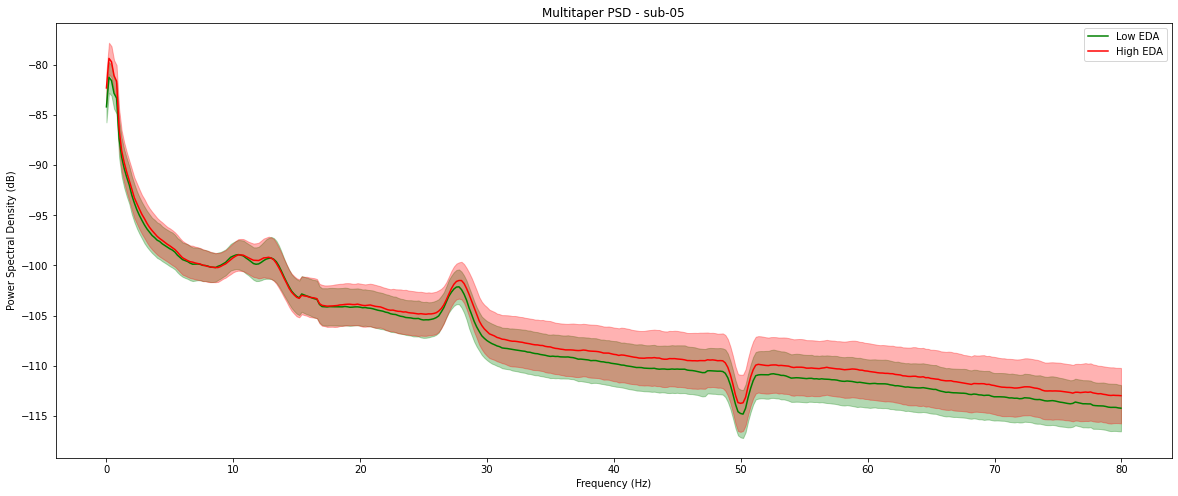

In [1]:
import mne
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime
import importlib
import os
import os.path as op

import h5io

plt.rcParams['figure.figsize'] = [20, 8] 

dataset =  'deap'
config_map = {'deap': "config_deap_eeg"}

cfg = importlib.import_module(config_map[dataset])
bids_root = cfg.bids_root
deriv_root = cfg.deriv_root
analyze_channels = cfg.analyze_channels

condition = 'rest'
feature_label = 'fb_covs'

#########  SET CONFIGS #########

# eda or emg?    
measure = 'eda'
# var or mean?   
y_stat = 'var'

DEBUG = True

################################


derivative_path = deriv_root 
pred_path = derivative_path / f'{measure}_predictions'

#%%


date = datetime.datetime.now().strftime("%d-%m--%H-%M")    
n_components = np.arange(1, 32, 1)
seed = 42
n_splits = 5
n_jobs = -1
score_name, scoring = "r2", "r2"
cv_name = '5Fold'


features_y = h5io.read_hdf5(deriv_root / f'features_EDA_{condition}.h5')

subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05']

for subject in subjects:
       
       eda_features = [features_y[subject]]
       y = eda_features[0]['meanEDA_SMNA']
       
       idx_low_EDA = []
       idx_high_EDA = []
       for ii in range(len(y)-1):
              if y[ii] < np.percentile(y, 25):
                     idx_low_EDA.append(ii)
              elif y[ii] > np.percentile(y, 75):
                     idx_high_EDA.append(ii)
              
       number_subject = subject[-2:]
       
       f, ax = plt.subplots()
       extension = '.fif'
       directory = 'outputs/DEAP-bids/derivatives/mne-bids-pipeline/'
       fname_fif = op.join(directory, 'sub-' + number_subject , 'eeg',
                     'sub-' + number_subject + '_task-rest_proc-autoreject_epo' + extension)
       epochs = mne.read_epochs(fname_fif, preload=True)

       psds, freqs = mne.time_frequency.psd_multitaper(epochs[idx_low_EDA], fmin=0, fmax=80, n_jobs=1)
       psds = 10 * np.log10(psds)  # convert to dB
       psds_mean = psds.mean(0).mean(0)
       psds_std = psds.mean(0).std(0)

       ax.plot(freqs, psds_mean, color='g', label='Low EDA')
       ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                     color='g', alpha=.3)

       psds, freqs = mne.time_frequency.psd_multitaper(epochs[idx_high_EDA], fmin=0, fmax=80, n_jobs=1)
       psds = 10 * np.log10(psds)  # convert to dB
       psds_mean = psds.mean(0).mean(0)
       psds_std = psds.mean(0).std(0)

       ax.plot(freqs, psds_mean, color='r', label='High EDA')
       ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                     color='r', alpha=.3)

       ax.legend()

       ax.set(title=f'Multitaper PSD - {subject}', xlabel='Frequency (Hz)',
              ylabel='Power Spectral Density (dB)')
       plt.show()

In [23]:
subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05']

print(subjects[0][-2:])

01


In [18]:
epochs.info

<Info | 14 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 32 EEG
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dig: 35 items (3 Cardinal, 32 EEG)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 80.0 Hz
 meas_date: 2010-07-01 10:00:16 UTC
 meas_id: 4 items (dict)
 nchan: 32
 projs: Average EEG reference: on
 sfreq: 512.0 Hz
 subject_info: 3 items (dict)
>

Using matplotlib backend: Qt5Agg
Using matplotlib as 2D backend.


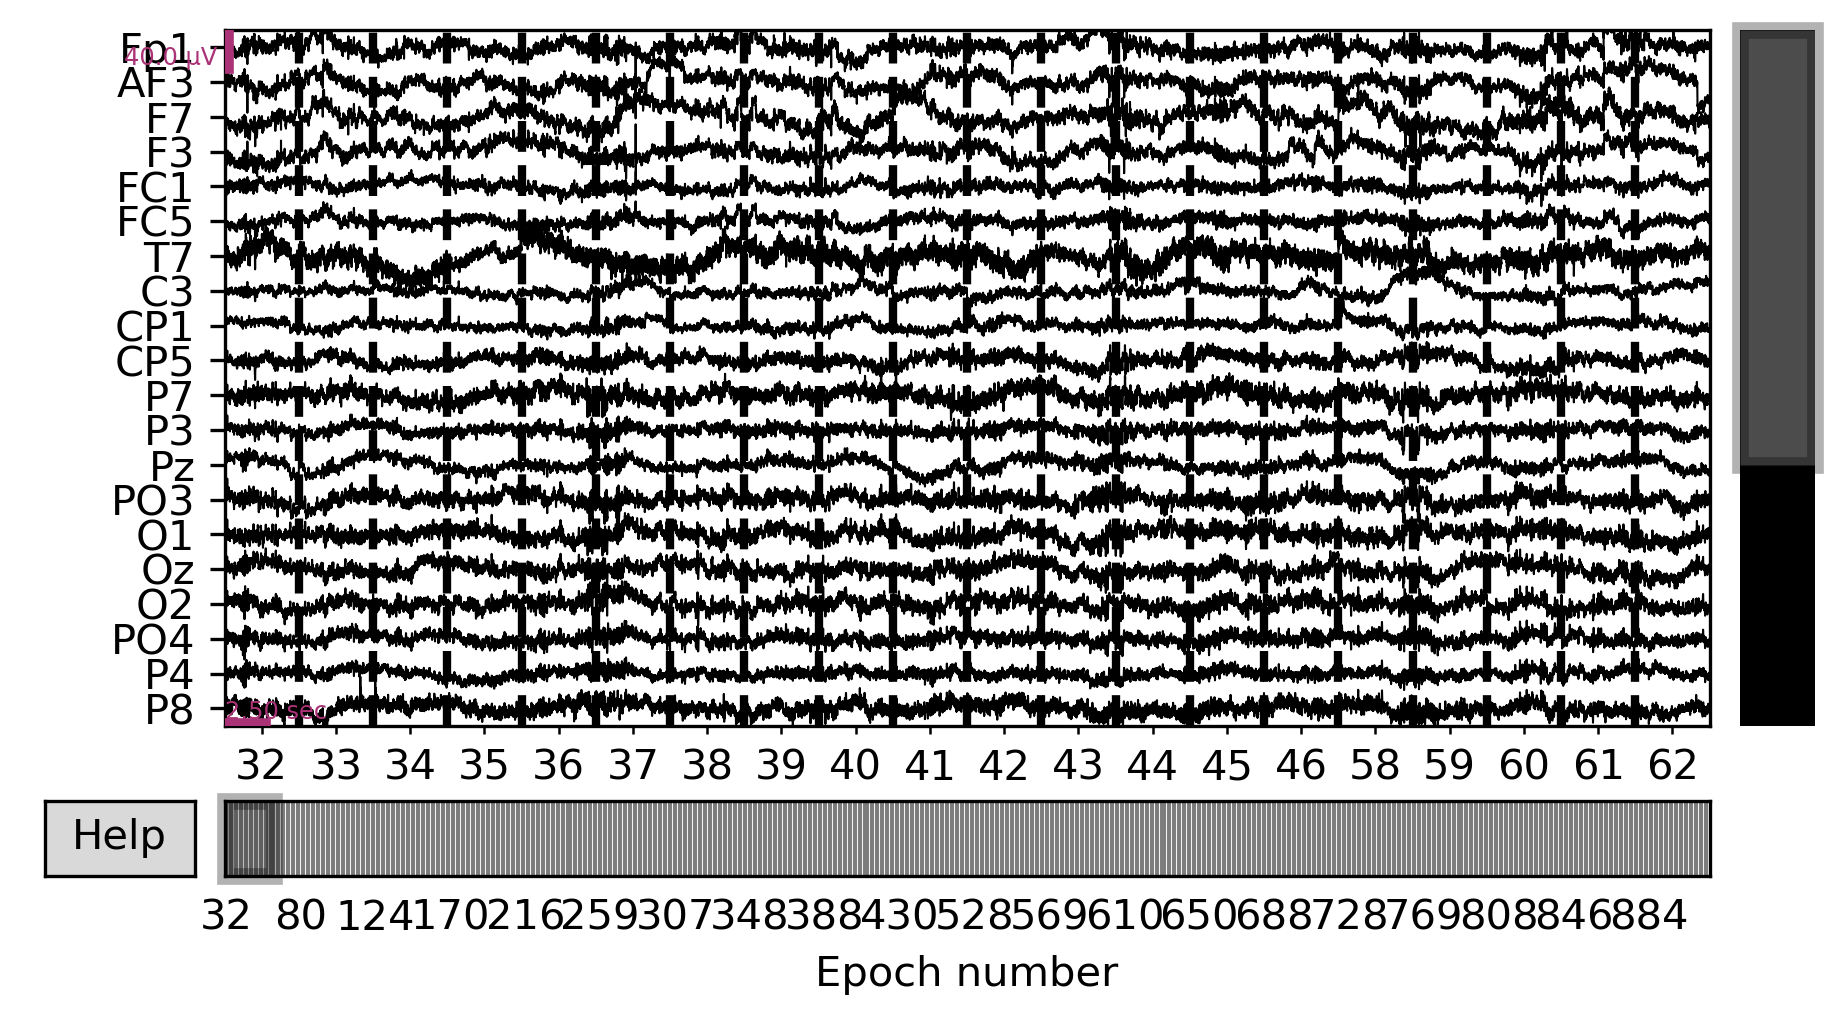

In [19]:
%matplotlib
epochs.plot()

In [20]:
epochs_846 = epochs[846]

IndexError: index 846 is out of bounds for axis 0 with size 595